# Detect Vessel Collisions
Now that we have our pipeline for taking a video of a microscope view of the brain during surgery and performing crops, color thresholding to produce masks, and recombining those back into gifs, its time to begin constructing the simulation in which our learner will live!

The first and most critical component of our simulation is to detect when the agent has selected a "lacing" site that collides with blood vasculature. This is my testing ground to figure out how to implement that

In [2]:
# ROS Kinetic Interferes with cv2 import

import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

In [14]:
import cv2
import argparse
import numpy as np
from numpy import savetxt
from fastai.vision import *
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

import os 
import glob
import imageio

In [4]:
# Useful function that was constructed the preserve the order of images since each image is related by the time
# dimension. 
def order_files_by_date(path_to_folder, file_type):
    files = glob.glob("%s*%s" % (path_to_folder, file_type))
    files.sort(key=os.path.getmtime)
    return files

In [6]:
top_segs = order_files_by_date(
    "/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/", 
    ".jpg")
top_segs

['/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop0.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop1.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop2.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop3.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop4.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop5.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop6.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop7.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop8.jpg',
 '/home/andrew/Github/neuralink-bot/Image_Segmentation/segmented_images/top_crop/_top_crop9.jpg',
 '/home/andrew/Githu

# Load Test Image

In [15]:
def get_example(image_files, index):
    return cv2.imread(image_files[index])

In [22]:
image = get_example(top_segs, 0)
image.shape

(2500, 2500, 3)

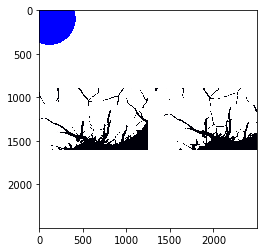

In [20]:
# Center coordinates 
center_coordinates = (120, 100) 
  
# Radius of circle 
radius = 300
   
# Red color in BGR 
color = (0, 0, 255) 
   
# Line thickness of -1 px 
thickness = -1
   
# Using cv2.circle() method 
# Draw a circle of red color of thickness -1 px 
image = cv2.circle(image, center_coordinates, radius, color, thickness) 

plt.imshow(image)
plt.show()